In [74]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
drug_data_csv = "data/mouse_drug_data.csv"
trial_data_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data_df = pd.read_csv(drug_data_csv)
trial_data_df = pd.read_csv(trial_data_csv)

# Combine the data into a single dataset
mouse = pd.merge(drug_data_df, trial_data_df, on="Mouse ID")
mouse.head()

# Display the data table for preview
mouse.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [75]:
mouse.count()

Mouse ID              1906
Drug                  1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
dtype: int64

In [76]:
mouse.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [77]:
#a little math
avg_tumor_vol = mouse["Tumor Volume (mm3)"].mean()
ste_tumor_vol = mouse["Tumor Volume (mm3)"].sem()


## Tumor Response to Treatment

In [78]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_data = pd.DataFrame({'Average Tumor Volume': mouse.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()}).reset_index()
# Convert to DataFrame

In [79]:
# Preview DataFrame
tumor_mean_data.head()

,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [80]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_err_data = pd.DataFrame({'Tumor Standard Error': mouse.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()}).reset_index()
# Convert to DataFrame

# Preview DataFrame
tumor_err_data.head()


,Drug,Timepoint,Tumor Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


<ErrorbarContainer object of 3 artists>

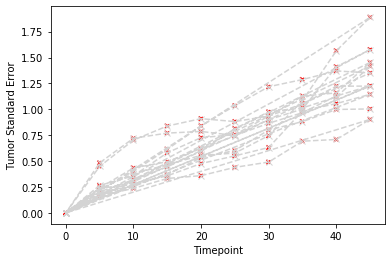

In [81]:
err_response_scatter = pd.DataFrame(tumor_err_data,columns=['Tumor Standard Error','Timepoint'])
err_response_scatter.plot(x ='Timepoint', y='Tumor Standard Error', color='red', linestyle='dashed', marker='x', kind = 'scatter')
plt.errorbar(x ='Timepoint', y='Tumor Standard Error', c='lightgrey', linestyle='dashed', marker='x', data=err_response_scatter)

In [82]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = mouse.reset_index(drop=True)
tumor_mean_pivot.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)", aggfunc='mean') 


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [83]:
tumor_err_pivot = mouse.reset_index(drop=True)
tumor_err_pivot.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)", aggfunc='sem') 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


<ErrorbarContainer object of 3 artists>

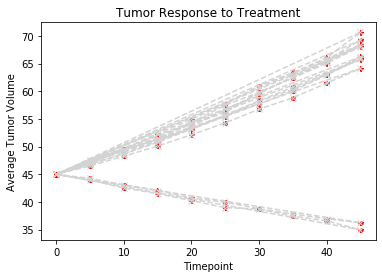

In [84]:
mean_response_scatter = pd.DataFrame(tumor_mean_data,columns=['Average Tumor Volume','Timepoint'])
mean_response_scatter.plot(x ='Timepoint', y='Average Tumor Volume',color='red', linestyle='dashed', marker='P', kind = 'scatter')
plt.title("Tumor Response to Treatment")
plt.errorbar(x ='Timepoint', y='Average Tumor Volume', c='lightgrey', linestyle='dashed', marker='x', data=mean_response_scatter)


In [ ]:
print("We can see that Ramicane and Capomulin have greatly reduced the size of the tumor over time compared to the rest of the sample")

<function matplotlib.pyplot.show(*args, **kw)>

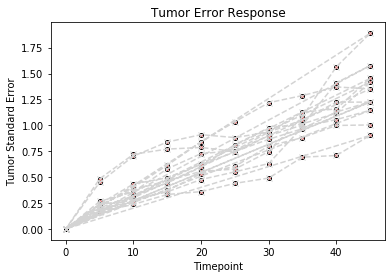

In [85]:
# Generate the Plot (with Error Bars)
err_response_scatter = pd.DataFrame(tumor_err_data,columns=['Tumor Standard Error','Timepoint'])
err_response_scatter.plot(x ='Timepoint', y='Tumor Standard Error', color='red', edgecolors="black", marker='P', kind = 'scatter')
# Save the Figure
plt.title("Tumor Error Response")
plt.errorbar(x ='Timepoint', y='Tumor Standard Error', c='lightgrey', linestyle='dashed', marker='x', data=err_response_scatter)
plt.show

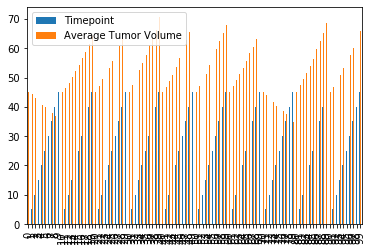

<Figure size 432x288 with 0 Axes>

In [52]:
tumor_mean_bar = tumor_mean_data
tumor_mean_bar.plot(kind='bar')

#(x ='Drug', y='Average Tumor Volume', kind = 'bar')
# Show the Figure
plt.show()

plt.tight_layout()

Text(0.5, 1.0, 'Tumor Response to Treatment')

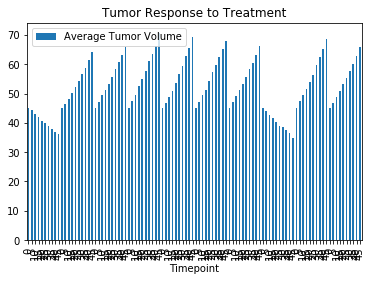

In [53]:
mean_response_bar = pd.DataFrame(tumor_mean_data,columns=['Average Tumor Volume','Timepoint'])
mean_response_bar.plot(x ='Timepoint', y='Average Tumor Volume', kind = 'bar')
plt.title("Tumor Response to Treatment")

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [54]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint / # Convert to DataFrame
met_avg_data = pd.DataFrame({'Metatstic Mean': mouse.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()}).reset_index()
# Preview DataFrame
met_avg_data.head()

,Drug,Timepoint,Metatstic Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [55]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_err_data = pd.DataFrame({'Metatstic Standard Error': mouse.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()}).reset_index(drop=False)
# Preview DataFrame
met_err_data.head()


,Drug,Timepoint,Metatstic Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [56]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_pivot = mouse.reset_index(drop=True)
met_mean_pivot.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites", aggfunc='mean') 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [57]:
met_err_pivot = mouse.reset_index(drop=True)
met_err_pivot.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites", aggfunc='sem') 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [58]:
print("Once again we can see that Ramicane and Capomulin have prevailed, slowing the metatastic rate of the tumor over time compared to the rest of the sample")

<ErrorbarContainer object of 3 artists>

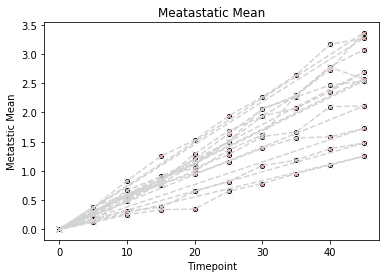

In [58]:
mean_metastatic_scatter = pd.DataFrame(met_avg_data,columns=['Metatstic Mean','Timepoint'])
mean_metastatic_scatter.plot(x ='Timepoint', y='Metatstic Mean', color='red', edgecolors="black", marker='P', kind = 'scatter')
plt.title("Meatastatic Mean")
plt.errorbar(x ='Timepoint', y='Metatstic Mean', c='lightgrey', linestyle='dashed', marker='x', data=mean_metastatic_scatter)

In [59]:
#plt.errorbar(x ='Timepoint', y='Metatstic Standard Error', yerr="err_metastatic_scatter.std", fmt='o', color='black',
#             ecolor='lightgray', elinewidth=3, capsize=0);

<ErrorbarContainer object of 3 artists>

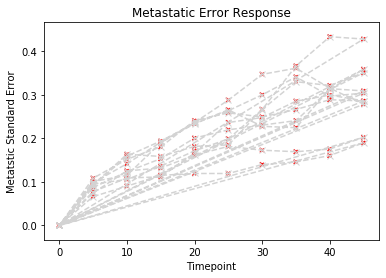

In [60]:
# Generate the Plot (with Error Bars)
err_metastatic_scatter = pd.DataFrame(met_err_data,columns=['Metatstic Standard Error','Timepoint', 'Drug'])
err_metastatic_scatter.plot(x ='Timepoint', y='Metatstic Standard Error', color='red', linestyle='dashed', marker='x', kind = 'scatter')
# Save the Figure
plt.title("Metastatic Error Response")
# Show the Figure
plt.errorbar(x ='Timepoint', y='Metatstic Standard Error', c='lightgrey', linestyle='dashed', marker='x', data=err_metastatic_scatter)

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [61]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data = pd.DataFrame({'Mouse Count': mouse.groupby(["Drug","Timepoint"])["Mouse ID"].count()}).reset_index()
# Convert to DataFrame

# Preview DataFrame
survival_data.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [62]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = mouse.reset_index(drop=True)
survival_count.pivot_table(index="Timepoint", columns="Drug", values="Mouse ID", aggfunc='count') 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


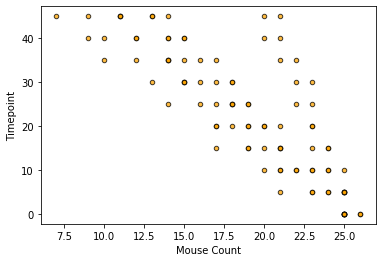

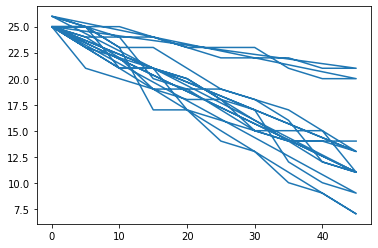

In [63]:
# Generate the Plot (Accounting for percentages)
ax2 = survival_data.plot.scatter(x='Mouse Count', y='Timepoint', c='orange', edgecolors="black", alpha=0.75)
# Save the Figure

# Show the Figure
plt.show()
plt.errorbar(x ='Timepoint', y='Mouse Count', data=survival_data)
plt.show()

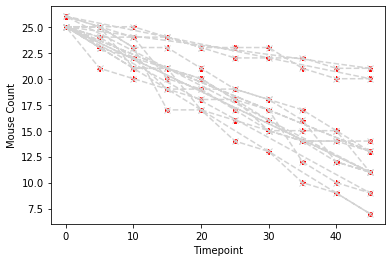

In [64]:
mouse_scatter = pd.DataFrame(survival_data,columns=['Mouse Count','Timepoint'])
mouse_scatter.plot(x ='Timepoint', y='Mouse Count', color='red', linestyle='dashed', marker='P', kind = 'scatter')
plt.errorbar(x ='Timepoint', y='Mouse Count', c='lightgrey', linestyle='dashed', marker='x', data=survival_data)
plt.show()


In [65]:
print("We can see that Ramicane and Capomulin have greatly extended the life span of two of the mice veruses the rest of the sample ")

We can see that Ramicane and Capomulin have greatly extended the life span of two of the mice veruses the rest of the sample 


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

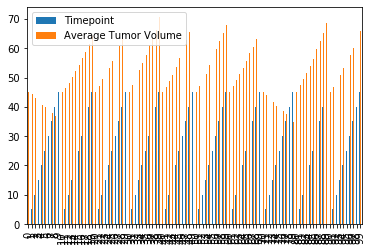

In [66]:
# Calculate the percent changes for each drug
tumor_mean_data.plot.bar()
# Display the data to confirm

In [67]:
%matplotlib inline

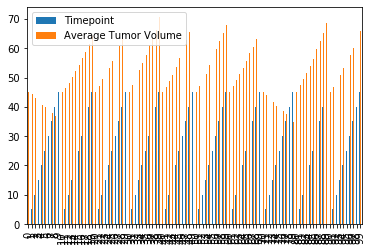

In [68]:
tumor_mean_data.plot.bar()
plt.show()

In [69]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)